# Обучение однослойного персептрона методом коррекции по ошибке через дельта-правило

In [4]:
PATH = 'D:\homework\OneLayerPerceptron TensorFlow\OneLayerPerceptron\data'
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.Resize(28),
                                transforms.ToTensor()])
train_dataset = datasets.ImageFolder(PATH+'/Train', transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
images, labels = next(iter(dataloader))

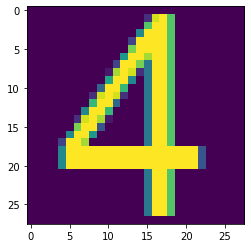

In [5]:
plt.imshow(images[0][0])

In [6]:
images = images[:, 0]
images = images.reshape(24, 28*28)

In [7]:
import torch
from torch.nn import Linear

In [8]:
input_size = 784
output_size = 1

In [ ]:
mlp = torch.nn.Sequential(
    Linear(input_size, output_size)
).to('cuda')

loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adadelta(mlp.parameters(), lr=learning_rate)
num_epoch = 5000

In [ ]:
train_data = torch.cuda.FloatTensor(images.numpy(), device='cuda')
train_labels = torch.cuda.FloatTensor(labels.numpy(), device='cuda')

loss_curve = []
for epoch in range(num_epoch):
    y_pred = mlp(train_data)
    loss = loss_fn(y_pred.reshape(-1), train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:

        print('Epoch:', epoch, 'Loss:', loss.item())
        loss_curve.append(loss.item())